<a href="https://colab.research.google.com/github/VekhovIO/StatPrac/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/diabetes.csv') #подключили датасет через гугл диск
##df = pd.read_csv('datasets/diabetes.csv', low_memory=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

data = df.loc[~df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].isna().any(axis=1)]

teachdata = df.loc[~df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].isna().any(axis=1)]

teachdata.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Первичные наблюдения из средних значений:
1)Уровень глюкозы в крови диабетиков сильно выше, чем у здоровых людей
2)Беременность довольно сильно повышает риск появления диабета
3)С возрастом вероятность заболеть диабетом растет
4)Чем больше вес человека, тем больше риск заболеть диабетом
5)Так называемая DPF, отвечающая за генетическую предрасположенность способна предсказать риск заболеть диабетом,
но не является точным индикатором

<ipython-input-5-b1fc29b3b2df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=teachdata, palette = 'hls')


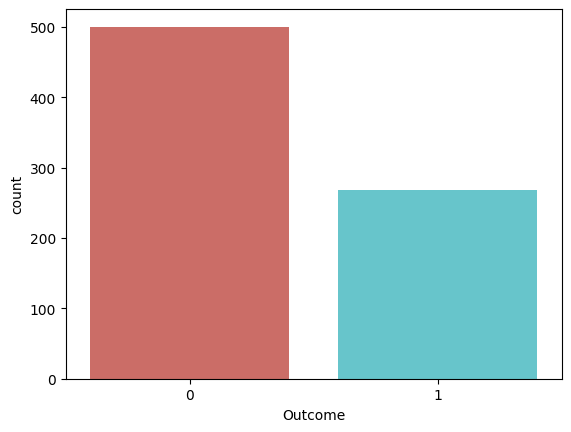

In [5]:
outc = teachdata['Outcome'].value_counts()
sns.countplot(x='Outcome', data=teachdata, palette = 'hls')
plt.show()

Классы здоровых и болеющих диабетом людей отличаются в 2 раза, что не критично.
Можно считать классы сбалансированными(потом проверим это ещё раз и подтвердим).

<Axes: ylabel='Density'>

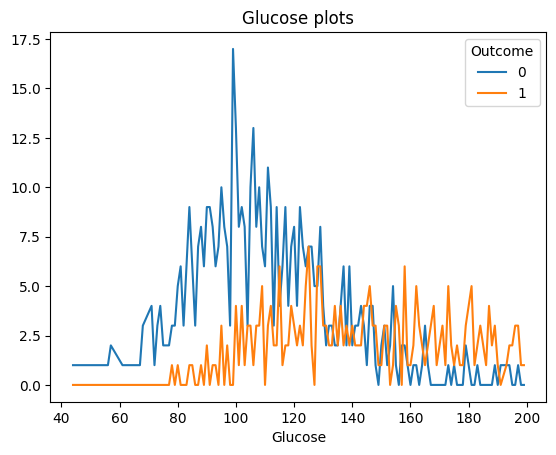

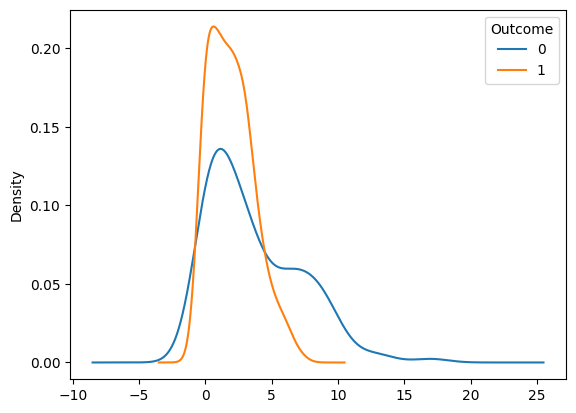

In [6]:
pd.crosstab(teachdata.loc[teachdata.Glucose > 0].Glucose,teachdata.Outcome).plot(title="Glucose plots")
pd.crosstab(teachdata.loc[teachdata.Glucose > 0].Glucose,teachdata.Outcome).plot.density()

<Axes: ylabel='Density'>

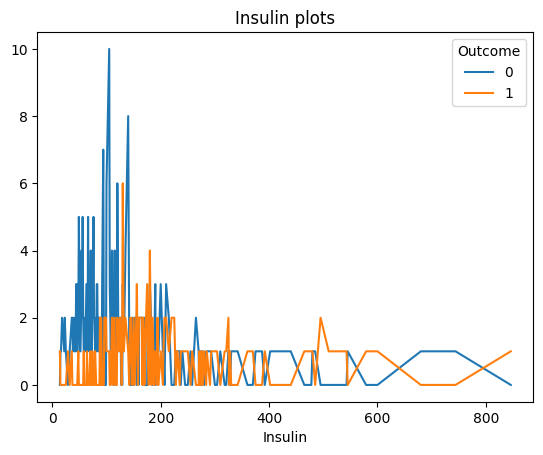

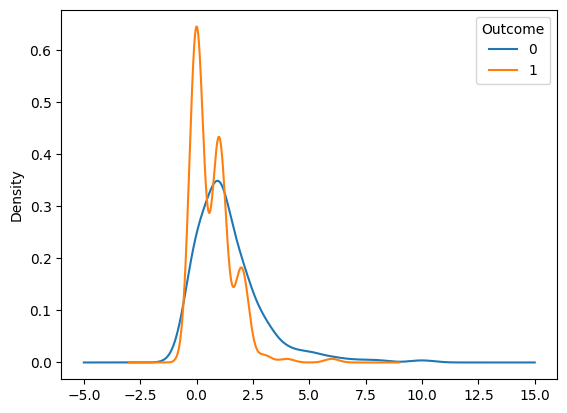

In [7]:
dat = teachdata.loc[teachdata.Insulin > 0]
pd.crosstab(dat.Insulin,dat.Outcome).plot(title="Insulin plots")
pd.crosstab(dat.Insulin,dat.Outcome).plot.density()

<Axes: ylabel='Density'>

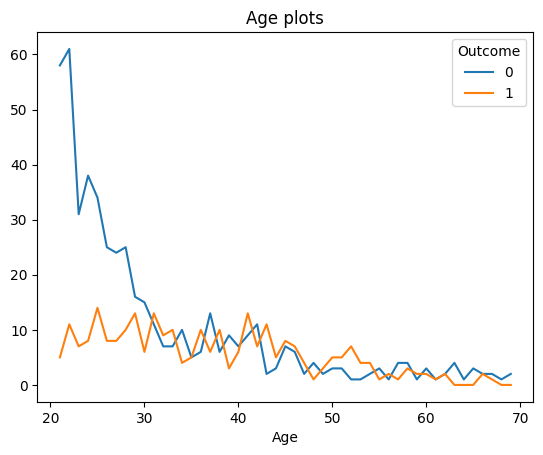

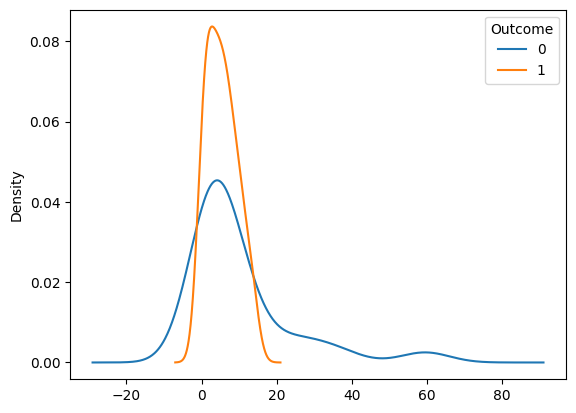

In [8]:
pd.crosstab(teachdata.loc[teachdata.Age < 70].Age,teachdata.Outcome).plot(title="Age plots")
pd.crosstab(teachdata.loc[teachdata.Age < 70].Age,teachdata.Outcome).plot.density()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = teachdata.drop('Outcome', axis=1)
y = teachdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Confusion Matrix:
[[95 28]
 [24 45]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель демонстрирует приемлемую, но не идеальную производительность. Она имеет некоторую способность различать образцы класса 0 и класса 1, но существует пространство для улучшений. Возможно, оптимизация гиперпараметров модели может улучшить ее производительность.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'penalty': ['l1', 'l2'],  # Тип регуляризации
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Обратная сила регуляризации
    'solver': ['liblinear'],  # Алгоритм оптимизации
    'class_weight': [None, 'balanced']  # Балансировка классов
}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.777736131934033
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



С помощью gridsearch удалось добиться значительного улучшения параметра accuracy, почти до 78%. Однако, precision и recall для класса 1 остались примерно на том же уровне

Протестируем метод catboost и попробуем улучшить нашу модель

In [19]:
!pip install catboost

In [20]:
from google.colab import output
output.enable_custom_widget_manager()

In [21]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = teachdata.drop('Outcome', axis=1)
y = teachdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

params = {"iterations": 500,
          "depth":5,
          "loss_function": "Logloss",
          "verbose": False}
          #"learning_rate": 0.001}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy: 0.7604166666666666
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       123
           1       0.68      0.64      0.66        69

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.76      0.76      0.76       192

Confusion Matrix:
[[102  21]
 [ 25  44]]


Как мы видим, показатели precision и recall выросли для обоих классов. Accuracy упало до 76%, но все же это выше чем у 1й модели (72%). Поэтому этот алгоритм является наиболее оптимальным

Построим ROC кривую нашей модели, чтобы визуально оценить ее производительность

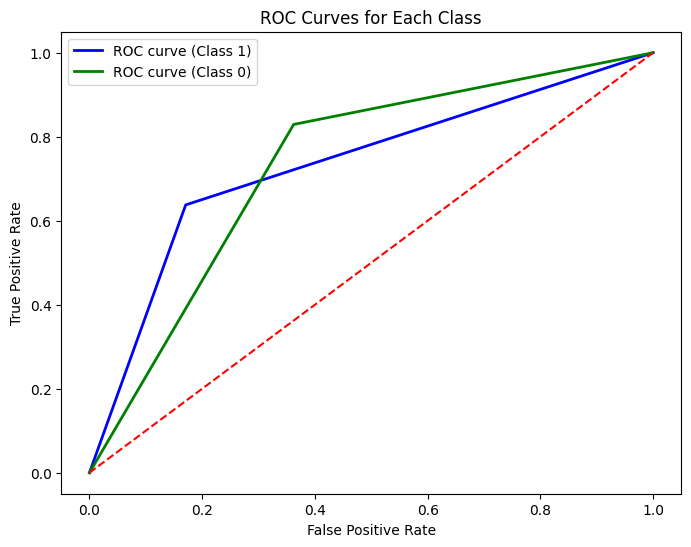

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

positive_class_index = 1
negative_class_index = 0

fpr_pos, tpr_pos, thresholds_pos = roc_curve(y_test, y_pred, pos_label=positive_class_index)
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, 1 - y_pred, pos_label=negative_class_index)

plt.figure(figsize=(8, 6))
plt.plot(fpr_pos, tpr_pos, color='blue', lw=2, label='ROC curve (Class 1)')
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve (Class 0)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()


##Исследование модели предсказания диабета позволяет сделать несколько ключевых выводов:

1. Производительность модели: Модель демонстрирует довольно неплохую производительность с точностью около 80%. Однако, есть некоторое количество ложных предсказаний.

2. Классификация: Модель способна правильно классифицировать большинство случаев, но имеет тенденцию совершать ошибки в предсказании положительных случаев (что не очень хорошо :) )